# Plotting input data

Label =  11


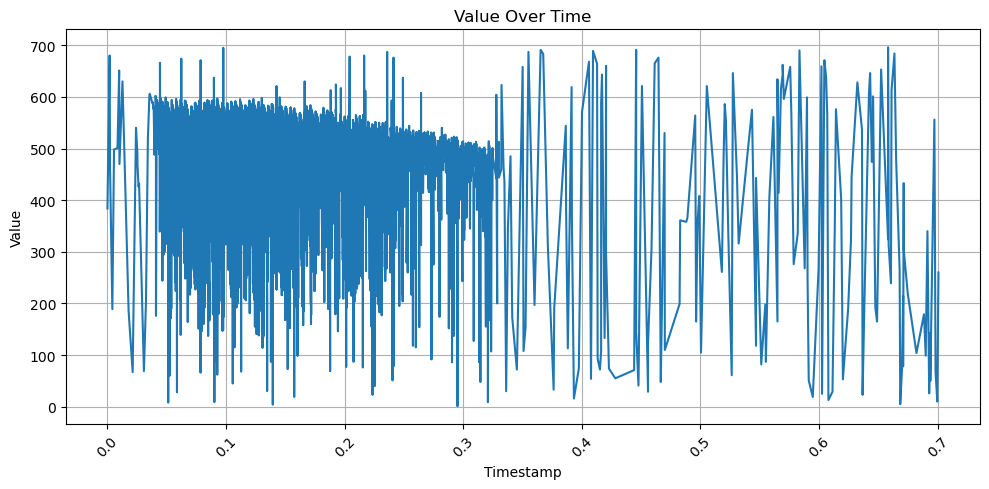

In [5]:
import matplotlib.pyplot as plt
from datetime import datetime

index = 0

# Example data
timestamps = x_train['times'][index]
values = x_train['units'][index]
label = y_train[index]

print('Label = ', label)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(timestamps, values)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Value Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [5]:
from utils import sparse_data_generator_from_hdf5_spikes

train_data_generator = list(sparse_data_generator_from_hdf5_spikes(x_train, y_train,
                                       batch_size=1,
                                       nb_steps=number_time_steps,
                                       nb_units=number_input_neurons,
                                       max_time=max_time,
                                       device=device))

test_data_generator = list(sparse_data_generator_from_hdf5_spikes(x_test, y_test,
                                       batch_size=1,
                                       nb_steps=number_time_steps,
                                       nb_units=number_input_neurons,
                                       max_time=max_time,
                                       device=device))

/home/mark/Dokumente/whk-snn/whk-snn/heidelberg_implementation/utils.py:54: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1744247799952/work/torch/csrc/utils/tensor_new.cpp:644.)
  X_batch = torch.sparse.FloatTensor(i, v, torch.Size([batch_size,nb_steps,nb_units])).to(device)


In [21]:
def create_svm_data_representation(data_generator):
    X = []
    Y = []

    count = 1
    end_length = len(data_generator)

    for x,y in data_generator[:100]:
        sample_vector = []
        x_dense = x.to_dense()[0]

        for neuron in range(number_input_neurons):
            summed = x_dense[:, neuron].sum().item()
            sample_vector.append(summed)
        
        X.append(sample_vector)
        Y.append(y.item())

        print(count/end_length)
        count +=1

    return X, Y

In [22]:
X_svm_train_data, y_svm_train_data = create_svm_data_representation(train_data_generator)
X_svm_test_data, y_svm_test_data = create_svm_data_representation(test_data_generator)

0.00012260912211868564
0.0002452182442373713
0.0003678273663560569
0.0004904364884747426
0.0006130456105934281
0.0007356547327121138
0.0008582638548307994
0.000980872976949485
0.0011034820990681706
0.0012260912211868563
0.001348700343305542
0.0014713094654242277
0.0015939185875429131
0.0017165277096615988
0.0018391368317802845
0.00196174595389897
0.0020843550760176557
0.002206964198136341
0.002329573320255027
0.0024521824423737125
0.002574791564492398
0.002697400686611084
0.0028200098087297694
0.0029426189308484553
0.003065228052967141
0.0031878371750858263
0.003310446297204512
0.0034330554193231977
0.003555664541441883
0.003678273663560569
0.0038008827856792545
0.00392349190779794
0.0040461010299166255
0.004168710152035311
0.004291319274153997
0.004413928396272682
0.004536537518391368
0.004659146640510054
0.004781755762628739
0.004904364884747425
0.005026974006866111
0.005149583128984796
0.005272192251103482
0.005394801373222168
0.005517410495340854
0.005640019617459539
0.005762628739

In [ ]:
neuron = 19
time_step = 2
batch = 0

x.to_dense()[batch][time_step][neuron]


In [118]:
len(data_generator)

8156

In [51]:
X = []
Y = []

count = 1
end_length = len(data_generator)

for x, y in data_generator[:100]:
    sample_vector = []
    x_dense = x.to_dense()[0]

    for neuron in range(number_input_neurons):
        summed = 0
        for time_step in range(number_time_steps):
            summed = summed + x_dense[time_step][neuron].item()
            

        sample_vector.append(summed)
    
    X.append(sample_vector)
    Y.append(y.item())

    print(count/end_length)
    count +=1

0.00012260912211868564
0.0002452182442373713
0.0003678273663560569
0.0004904364884747426
0.0006130456105934281
0.0007356547327121138


KeyboardInterrupt: 

In [41]:
X

[[0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  2.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  2.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  2.0,
  0.0,
  1.0,
  2.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  2.0,
  1.0,
  2.0,
  0.0,
  2.0,
  2.0,
  1.0,
  2.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  2.0,
  4.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  2.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  2.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  3.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(X_svm_train_data, y_svm_train_data)

y_pred = clf.predict(X_svm_test_data)
accuracy = accuracy_score(y_svm_test_data, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.07


label =  tensor([11])


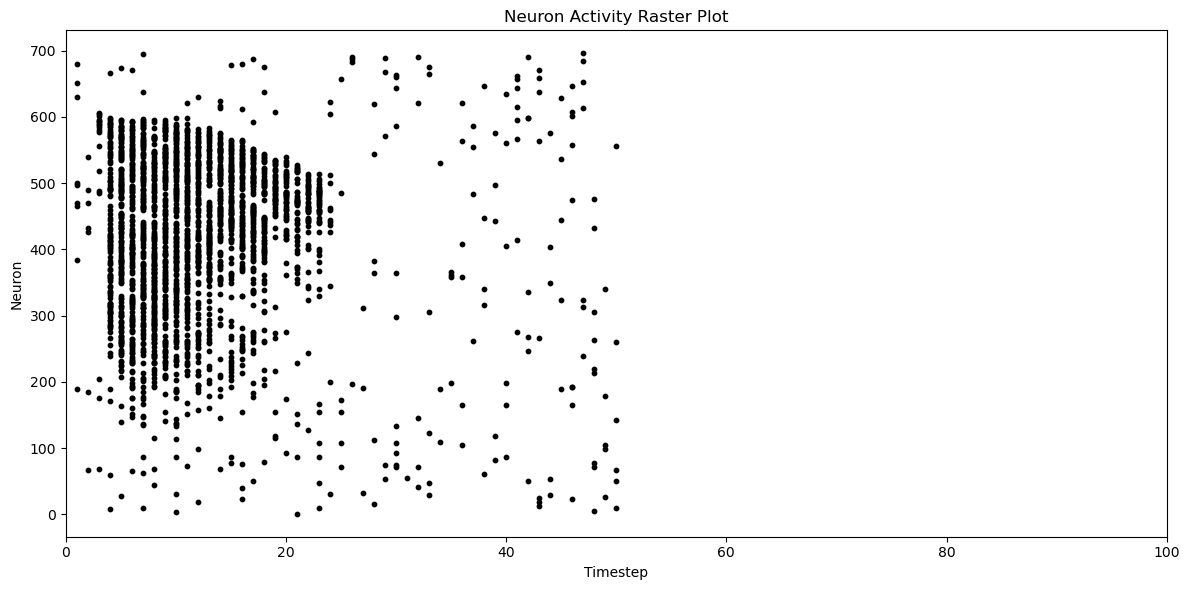

In [108]:
import numpy as np
import matplotlib.pyplot as plt

x,y = data_generator[0]
data = x.to_dense()[0]

# Get coordinates of all 1s
times, neurons = np.where(data == 1)

print('label = ', y)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(times, neurons, s=10, color='black')  # s controls dot size
plt.xlabel('Timestep')
plt.ylabel('Neuron')
plt.title('Neuron Activity Raster Plot')
plt.xlim(0, number_time_steps)
#plt.gca().invert_yaxis()  # Optional: place neuron 0 at top
plt.tight_layout()
plt.show()


# Debugging

In [ ]:
def get_mini_batch(x_data, y_data, shuffle=False):
    for ret in sparse_data_generator_from_hdf5_spikes(x_data, y_data, 
                                                      batch_size=batch_size, 
                                                      nb_steps=number_time_steps, 
                                                      nb_units=number_input_neurons, 
                                                      max_time=max_time,
                                                      device=device,
                                                      shuffle=shuffle):
        return ret 

In [ ]:
x_batch, y_batch = get_mini_batch(x_test, y_test)
output, other_recordings = run_snn(x_batch.to_dense(), 
                                   batch_size=batch_size,
                                   nb_hidden=number_hidden_neurons,
                                   nb_steps=number_time_steps,
                                   nb_outputs=number_output_neurons,
                                   device=device,
                                   dtype=dtype,
                                   alpha=alpha,
                                   beta=beta,
                                   weights=weights)

mem_rec, spk_rec = other_recordings

In [ ]:
# spk_rec[batch][timestep][neuron]
# in total 200 neurons because we are looking at the hidden layer here

200

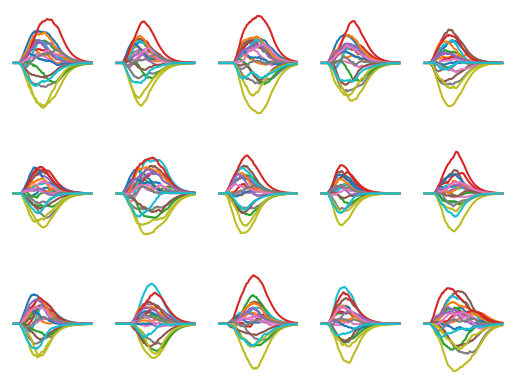

In [42]:
fig=plt.figure(dpi=100)
plot_voltage_traces(output)

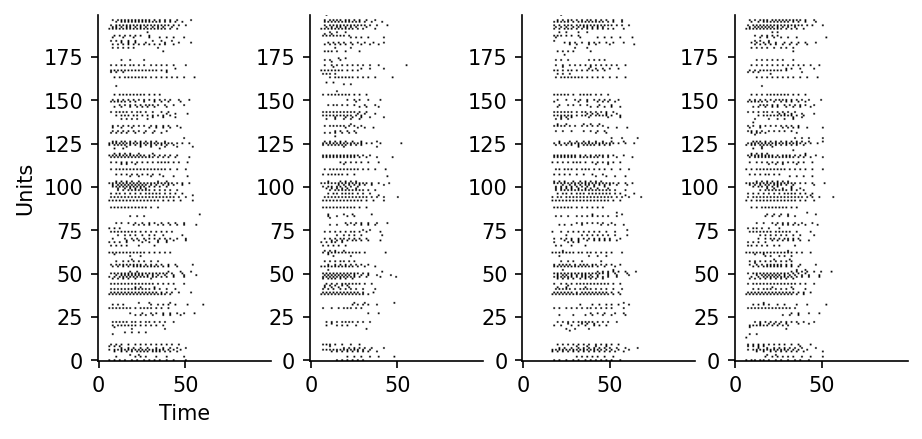

In [43]:
# Let's plot the hiddden layer spiking activity for some input stimuli

nb_plt = 4
gs = GridSpec(1,nb_plt)
fig= plt.figure(figsize=(7,3),dpi=150)
for i in range(nb_plt):
    plt.subplot(gs[i])
    plt.imshow(spk_rec[i].detach().cpu().numpy().T,cmap=plt.cm.gray_r, origin="lower" )
    if i==0:
        plt.xlabel("Time")
        plt.ylabel("Units")

    sns.despine()